In [1]:
import os
MONTH = {"1":"Jan", "2":"Feb", "3":"Mar", "4":"Apr",
         "5":"May", "6":"Jun", "7":"Jul", "8":"Aug",
         "9":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}

IMG_PATH = "./image/"
image_list = os.listdir(IMG_PATH)
image_list.sort()
image_list

['10-19.jpg',
 '11-10.jpg',
 '11-17.jpg',
 '11-5.jpg',
 '11-6.jpg',
 '3-3.jpg',
 '4-18.jpg',
 '6-16.jpg',
 '6-29.jpg']

In [2]:
def generate_cmap_from_img(img_idx=-1, N_sampler=100, month=None, date=None):

    # load_image
    from PIL import Image
    if img_idx > -1:
        img = Image.open(IMG_PATH + image_list[img_idx])
        month = image_list[img_idx].split("-")[0]
        date  = image_list[img_idx].split("-")[1].split(".")[0]
    elif month and date:
        img = Image.open(IMG_PATH + f"{month}-{date}.jpg")
        img = Image.open(IMG_PATH + f"{month}-{date}.jpg")

    # size = (width, height)
    shape = img.size  
    
    # manual colorbar
    from matplotlib.colors import LinearSegmentedColormap

    colors = []
    
    for i in range(N_sampler):
        length = shape[1] // N_sampler
        start  = length * i
        med_color = np.median(np.array(img)[start:start+length, :, :], axis=(0,1)).astype(int)
        # https://stackoverflow.com/questions/3380726
        hex_string = '#%02x%02x%02x' % (med_color[0], med_color[1], med_color[2])
        colors.append( (i / (N_sampler - 1), hex_string) )

    cmap = LinearSegmentedColormap.from_list('sunset_sky', colors)
    return cmap, month, date

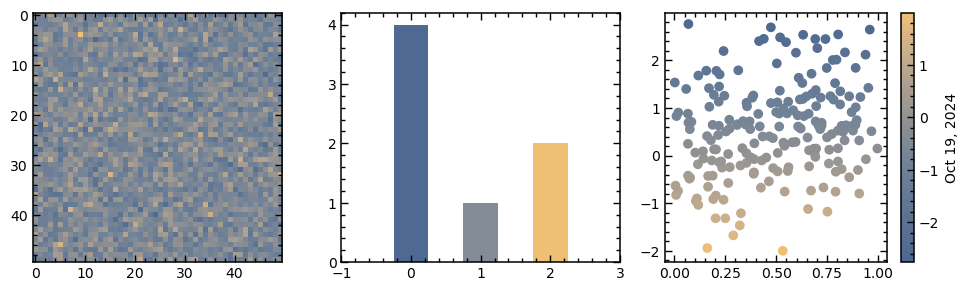

In [8]:
# some random dataset
np.random.seed(42)
rand_img = np.random.randn(50, 50)
rand_arr_x = np.random.rand(200)
rand_arr_y = rand_arr_x + np.random.randn(200)

# choose an image index, or use month+date
i = 0
cmap, month, date = generate_cmap_from_img(img_idx=i)

# month, date = 10, 19
# cmap, month, date = generate_cmap_from_img(month=month, date=date)

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.imshow(rand_img, cmap=cmap)
plt.subplot(132)
plt.bar([0,1,2], [4,1,2], width=0.5, 
        color=[cmap(c) for c in [0., 0.5, 1.]])
plt.xlim(-1, 3)
plt.subplot(133)
plt.scatter(rand_arr_x, rand_arr_y, c=-rand_arr_y, cmap=cmap)
plt.colorbar(label=f"{MONTH[month]} {date}, 2024")
plt.tight_layout()